# DTEK0042 Exercise 2
    Group Members:
    1. Milja Lempinen
    2. Helena Lähdesniemi
    3. Jeremi Nyyssönen

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure. 

## library Imports

In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

[2350. 2423. 2375. ... 6388. 6455. 6426.]


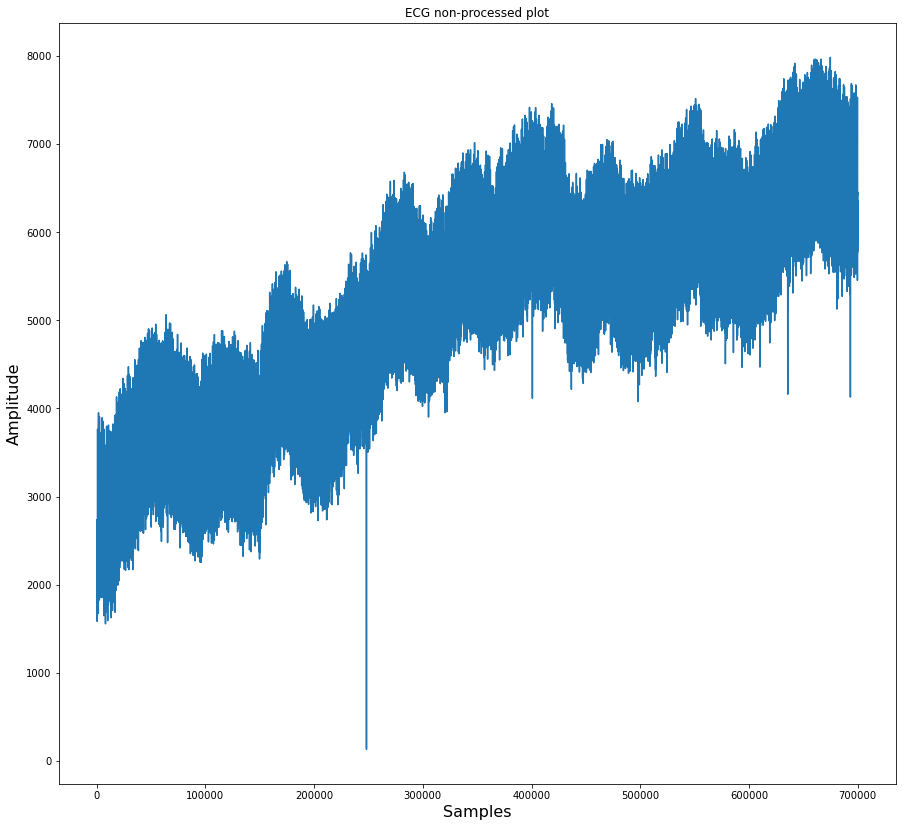

In [3]:
ECG_sig = np.loadtxt("/Users/miljalempinen/Documents/Pythontreeni/ECG_800hz.txt")
print(ECG_sig)
plt.figure(figsize=(15,14))
plt.title("ECG non-processed plot")
plt.xlabel("Samples",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(ECG_sig)

# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

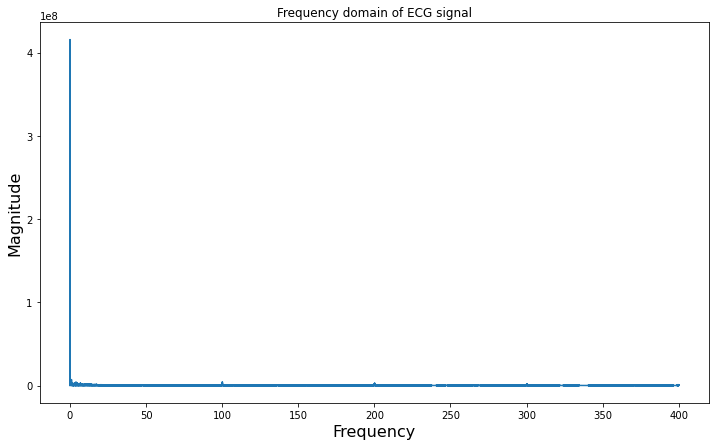

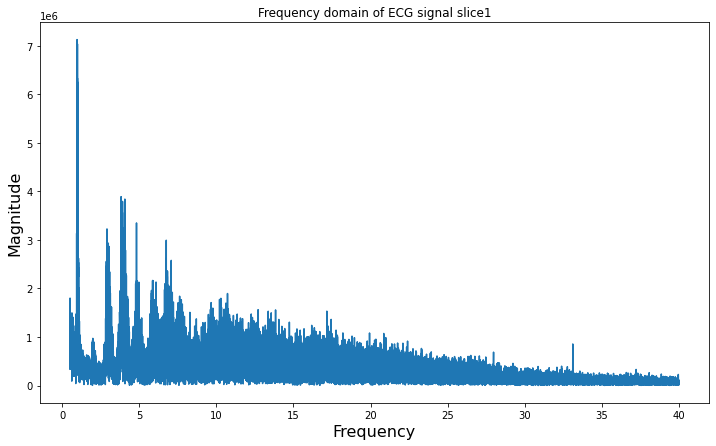

In [4]:
sample_rate=800
ECG_meanremoved = ECG_sig-np.mean(ECG_sig)
n=len(ECG_meanremoved)

magnitude = np.abs(np.fft.rfft(ECG_meanremoved,axis=0))
#absolute value
frequency = np.fft.rfftfreq(n,d=1.0/sample_rate) #DFT with only positive frequencies

slice1 = np.where((0.5 <= frequency) & (frequency <= 40))

plt.figure(figsize=(12,7))
plt.title("Frequency domain of ECG signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Magnitude",fontsize=16)
plt.plot(frequency,magnitude)

plt.show()

plt.figure(figsize=(12,7))
plt.title("Frequency domain of ECG signal slice1")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Magnitude",fontsize=16)
plt.plot(frequency[slice1], magnitude[slice1])

# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. 

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

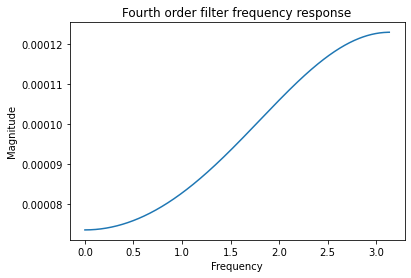

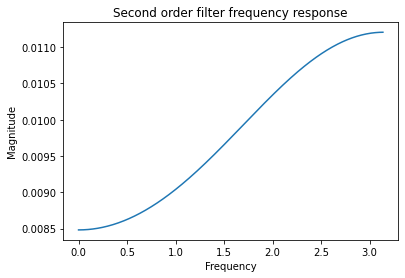

In [5]:
import scipy.signal
from scipy.signal import butter
def butterworth_bandpass( lowcut, highcut, order):
    nyq = 0.5 * 800
    low = lowcut / nyq
    high = highcut / nyq
    b,a = sp.signal.butter(order,[low,high],'bandpass', 800)
    return b,a

#Butterworth fourth order filter
b1 = butterworth_bandpass(0.5,40,4)
h1, w1 = sp.signal.freqz(b1[0],b1[1],plot=lambda w1, h1: plt.plot(w1, np.abs(h1)))
plt.title("Fourth order filter frequency response")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

#Butterworth second order filter
b2 = butterworth_bandpass(0.5,40,2)
#h, w = sp.signal.freqz(b2[0],b2[1])
h2, w2 = sp.signal.freqz(b2[0],b2[1],plot=lambda w2,h2: plt.plot(w2,np.abs(h2)))
plt.title("Second order filter frequency response")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

## Observations:
The fourth order figure is more steep, which tells us that it filters out more frequencies.

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

Text(0.5, 0, 'Samples')

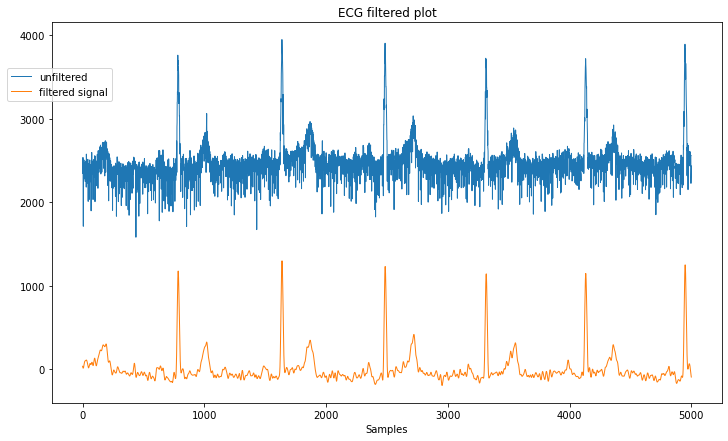

In [6]:
nyq = 800/2
low = 0.5 / nyq
high = 40 / nyq
#b,a = sp.signal.butter(4,[low,high],'bandpass', False,'ba', 800)
b,a = sp.signal.butter(4, [low,high], 'bandpass')

filtered_signal1 = scipy.signal.filtfilt(b, a, ECG_sig)
    

fig = plt.figure(figsize=(12,7))
plt.plot(ECG_sig[:5000], label="unfiltered", linewidth=1)
plt.plot(filtered_signal1[:5000], label="filtered signal", linewidth=1)
fig.legend(bbox_to_anchor=(0.20,0.8))
plt.title("ECG filtered plot")
plt.xlabel("Samples")


## Observations: 
After filtering, the peaks of the signal are better visible than before and the noise seems to be filtered out by the most of it. 

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

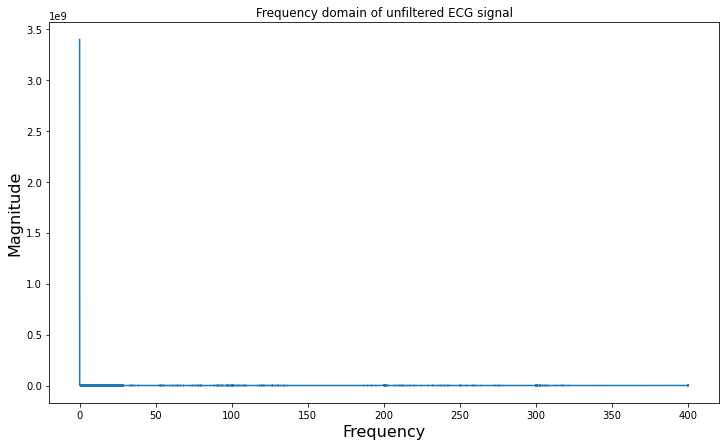

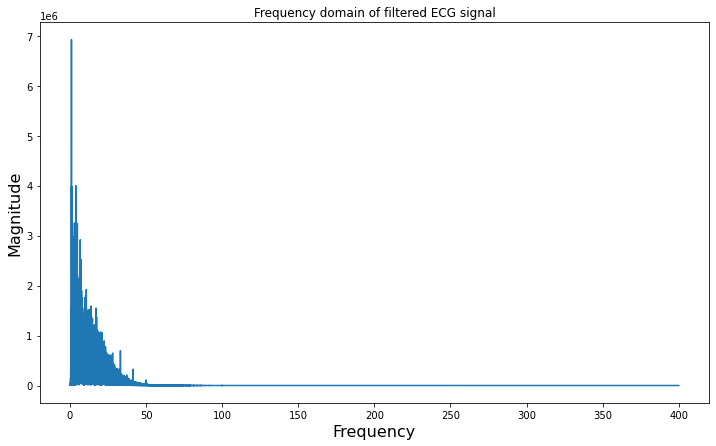

In [7]:
magnitude1 = np.abs(np.fft.rfft(ECG_sig,axis=0))
#absolute value
frequency1 = np.fft.rfftfreq(len(ECG_sig),d=1.0/sample_rate) #DFT with only positive frequencies
plt.figure(figsize=(12,7))
plt.title("Frequency domain of unfiltered ECG signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Magnitude",fontsize=16)
plt.plot(frequency1,magnitude1)

plt.show()

magnitude2 = np.abs(np.fft.rfft(filtered_signal1,axis=0))
#absolute value
frequency2 = np.fft.rfftfreq(len(filtered_signal1),d=1.0/sample_rate)#DFT with only positive frequencies
plt.figure(figsize=(12,7))
plt.title("Frequency domain of filtered ECG signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Magnitude",fontsize=16)
plt.plot(frequency2,magnitude2)

plt.show()

## Observations:
From the plotted signals, we can see the affect of the filter, as the frequencies present in the signal are limited. In the first plot, the signal is on a more broad area, compared to the second, where it is "packed" in frequencies under 50Hz.

# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


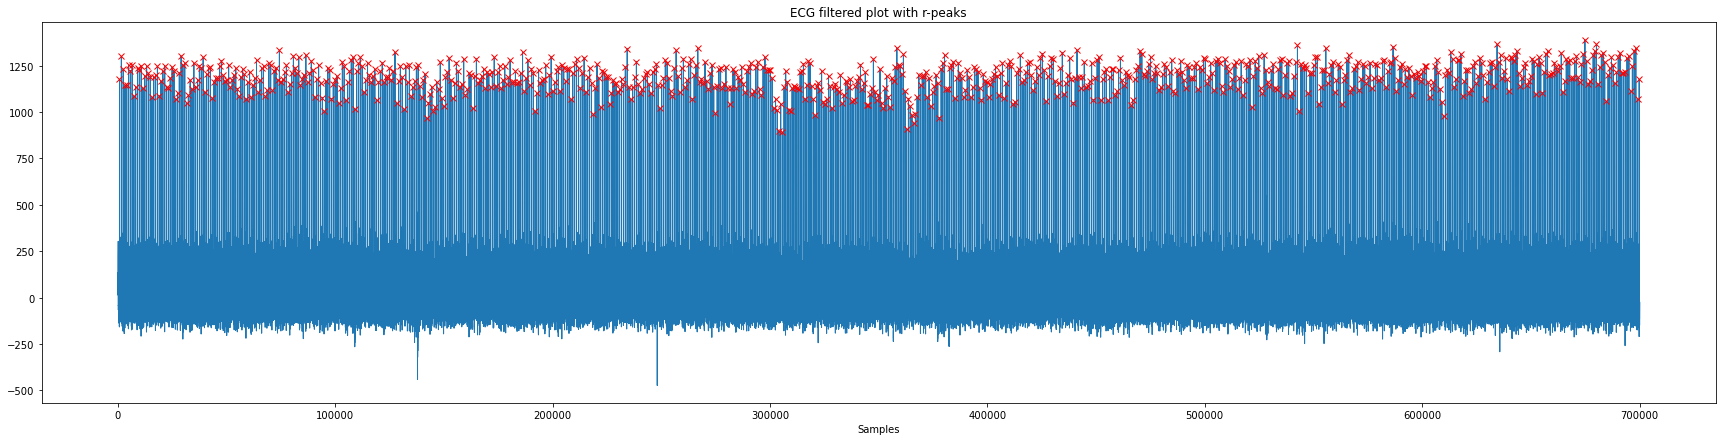

In [12]:
#still need to locally install biosppy
#code
#!pip install biosppy
import biosppy 
from biosppy.signals import ecg 

r_peaks = biosppy.signals.ecg.hamilton_segmenter(filtered_signal1, sampling_rate=800)

#plot red x's where the top 3 peaks are
fig = plt.figure(figsize=(30,7))
plt.plot(filtered_signal1, label="filtered signal", linewidth=1)
plt.title("ECG filtered plot with r-peaks")
plt.xlabel("Samples")
plt.plot(r_peaks['rpeaks'],filtered_signal1[r_peaks],"rx")
plt.show()


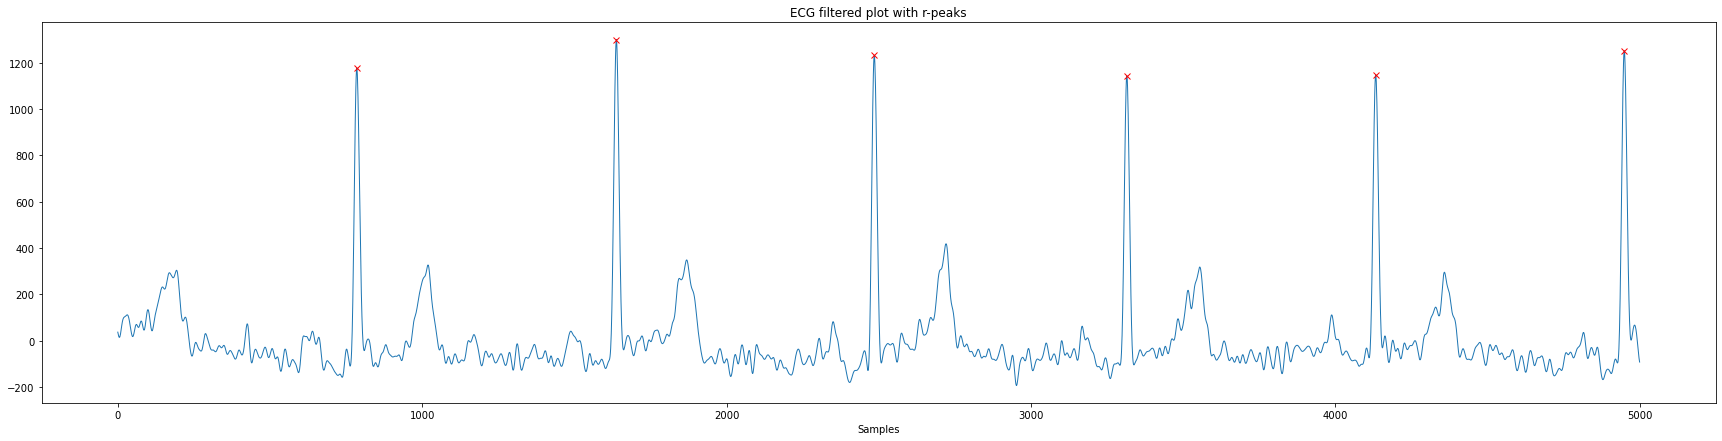

In [9]:
r_peaks2 = biosppy.signals.ecg.hamilton_segmenter(filtered_signal1[:5000], sampling_rate=800)

fig = plt.figure(figsize=(30,7))
plt.plot(filtered_signal1[:5000], label="filtered signal", linewidth=1)
plt.title("ECG filtered plot with r-peaks")
plt.xlabel("Samples")
plt.plot(r_peaks2['rpeaks'],filtered_signal1[r_peaks2],"rx")
plt.show()

## Observations:
We were able to detect the r-peaks of a QRS-complex. The peaks are listed on a variable as indices in the actual filtered signal.